In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.MergeNet()

CNN configuration: 
    Our CNN with different "legs" for image, prob, merged_array, border_overlap.
    


In [3]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder1')

Loaded /home/d/patches/cylinder1/ in 0.0167579650879 seconds.


In [ ]:
cnn = cnn.fit({'image_input': X_train['image'],
               'prob_input': X_train['prob'],
               'binary_input': X_train['merged_array'],
               'border_input': X_train['border_overlap']},
               y_train)

In [5]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array'],
           'border_input': X_test['border_overlap']},
           y_test)

0.852569018404908

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

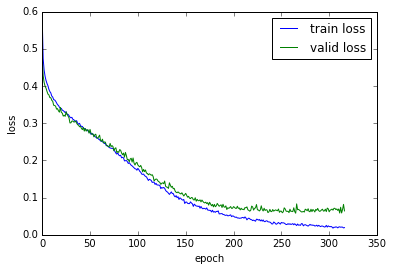

In [6]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)